# Separate analysis of Terrestrial/Giant-type systems

- KDE analysis on the first consolidated data created in the `prep/dataprep.ipynb` notebook (separated by systems with giant planets (gt) and terrestrial planet-only systems (tr)). 
- Linear regression analysis of sigmag0, metallicity, mass efficiency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fold='../prep/'

In [3]:
dnpg=pd.read_csv(fold+'gt_no_pert.csv')
dlpg=pd.read_csv(fold+'gt_lo_pert.csv')
dhpg=pd.read_csv(fold+'gt_hi_pert.csv')

dnpt=pd.read_csv(fold+'tr_no_pert.csv')
dlpt=pd.read_csv(fold+'tr_lo_pert.csv')
dhpt=pd.read_csv(fold+'tr_hi_pert.csv')

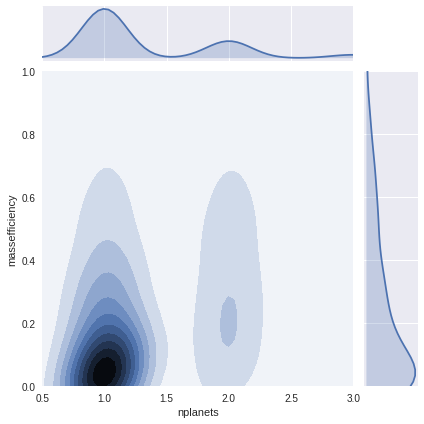

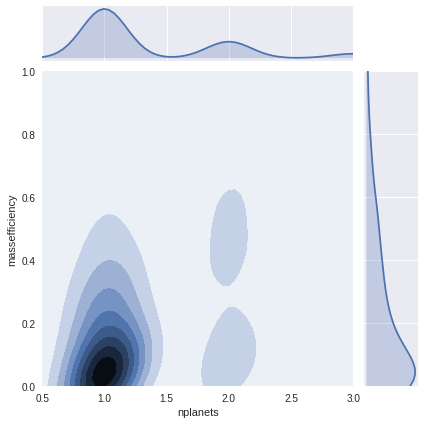

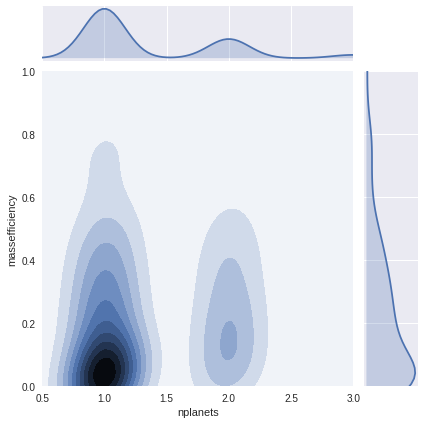

In [4]:
# it appears that systems that create 2 planets have a higher mass efficiency 
# than those that create 1
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dnpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dlpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))
ax=sns.jointplot(x="nplanets", y="massefficiency", data=dhpg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(0,1))

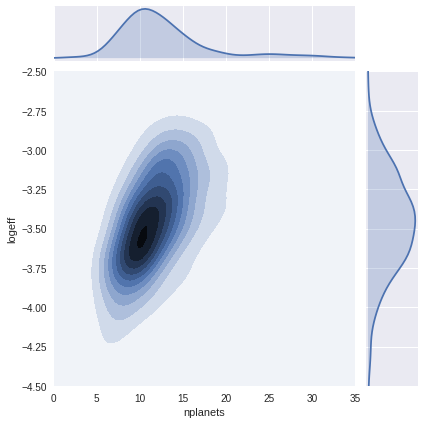

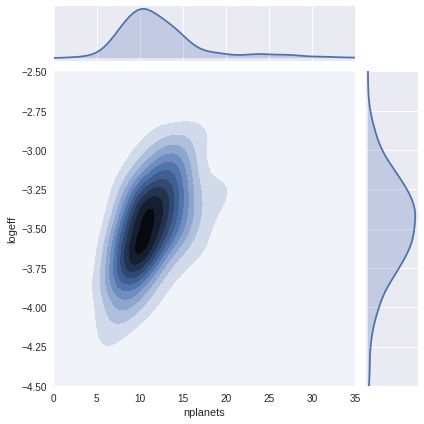

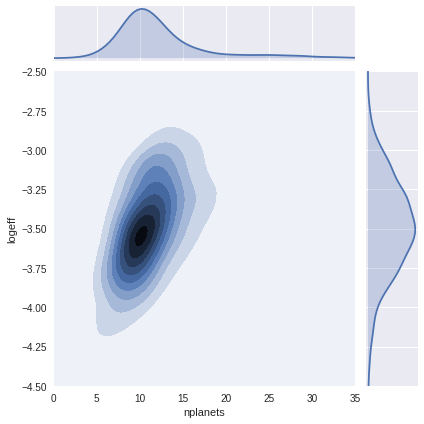

In [5]:
# higher mass efficiency yields more planets for tps
dnpt['logeff']=np.log10(dnpt.massefficiency)
dlpt['logeff']=np.log10(dlpt.massefficiency)
dhpt['logeff']=np.log10(dhpt.massefficiency)
ax=sns.jointplot(x="nplanets", y="logeff", data=dnpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dhpt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))

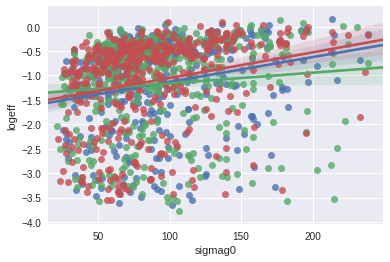

In [50]:
# higher sigmag0, higher mass efficiency for giant planetary systems
sns.regplot(x="sigmag0", y="logeff", data=dnpg)
sns.regplot(x="sigmag0", y="logeff", data=dlpg)
sns.regplot(x="sigmag0", y="logeff", data=dhpg)

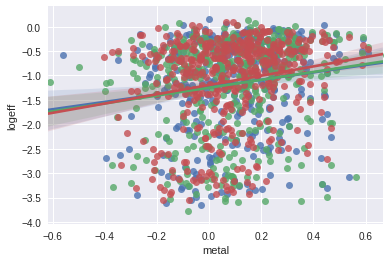

In [53]:
# higher metallicity, higher mass efficiency for gps
sns.regplot(x="metal", y="logeff", data=dnpg)
sns.regplot(x="metal", y="logeff", data=dlpg)
sns.regplot(x="metal", y="logeff", data=dhpg)

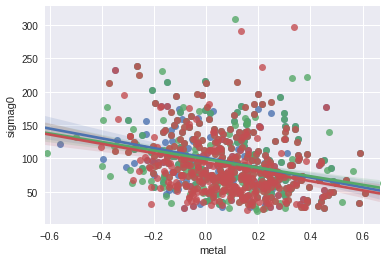

In [58]:
# higher metallicity, lower sigmag0 for gps
sns.regplot(x="metal", y="sigmag0", data=dnpg)
sns.regplot(x="metal", y="sigmag0", data=dlpg)
sns.regplot(x="metal", y="sigmag0", data=dhpg)

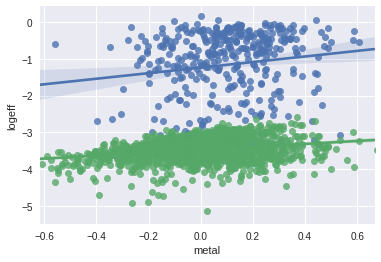

In [59]:
# much higher efficiencies for gps than for tps
sns.regplot(dnpg.metal,dnpg.logeff)
sns.regplot(dnpt.metal,dnpt.logeff)

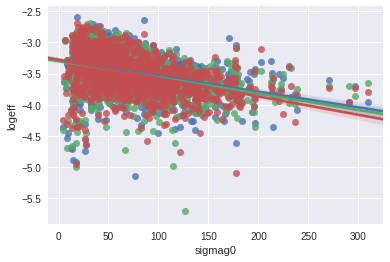

In [52]:
# higher sigmag0, lower mass efficiency for terrestrial planetary systems
# this happens because high density favors gp formation over tp formation
sns.regplot(x="sigmag0", y="logeff", data=dnpt)
sns.regplot(x="sigmag0", y="logeff", data=dlpt)
sns.regplot(x="sigmag0", y="logeff", data=dhpt)

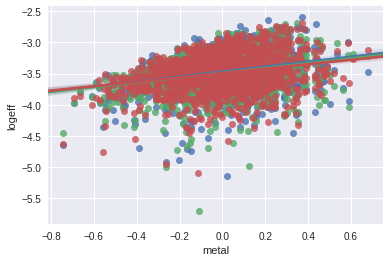

In [57]:
# higher metallicity, higher mass efficiency for tps
sns.regplot(x="metal", y="logeff", data=dnpt)
sns.regplot(x="metal", y="logeff", data=dlpt)
sns.regplot(x="metal", y="logeff", data=dhpt)

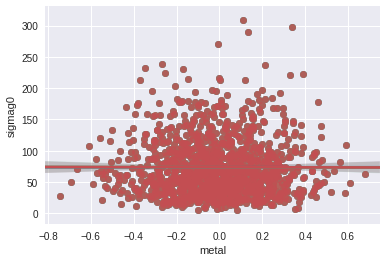

In [60]:
# no correlation between metallicity and sigmag0 for tps
sns.regplot(x="metal", y="sigmag0", data=dnpt)
sns.regplot(x="metal", y="sigmag0", data=dlpt)
sns.regplot(x="metal", y="sigmag0", data=dhpt)

## From here on, no results

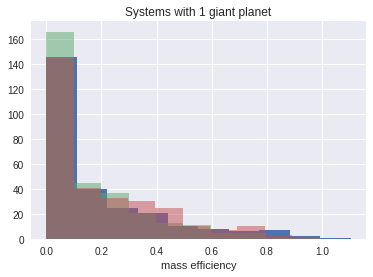

In [6]:
# no effect
filtern=dnpg.nplanets==1
filterl=dlpg.nplanets==1
filterh=dhpg.nplanets==1
plt.hist(dnpg.massefficiency[filtern])
plt.hist(dlpg.massefficiency[filterl],alpha=0.5)
plt.hist(dhpg.massefficiency[filterh],alpha=0.5)
plt.xlabel('mass efficiency')
plt.title('Systems with 1 giant planet')

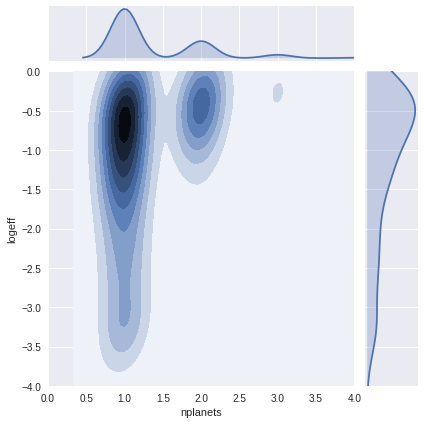

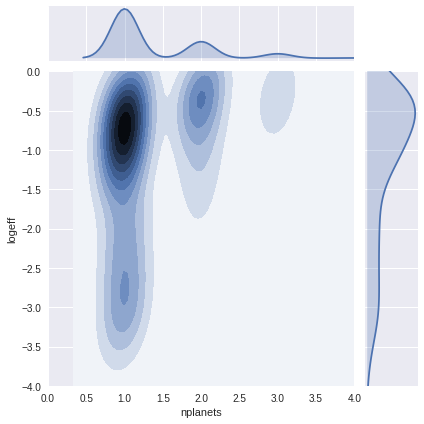

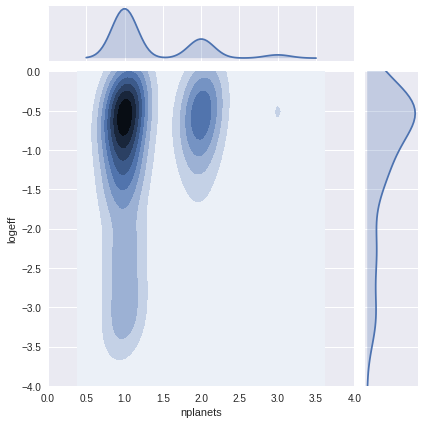

In [7]:
# no effect
dnpg['logeff']=np.log10(dnpg.massefficiency)
dlpg['logeff']=np.log10(dlpg.massefficiency)
dhpg['logeff']=np.log10(dhpg.massefficiency)
ax=sns.jointplot(x="nplanets", y="logeff", data=dnpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dhpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))

In [13]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

def uni_kde(x,y,tickno=5,nlev=30):
    x_grid=np.around(np.arange(x.min(),x.max(),0.1),2)
    y_grid=np.linspace(y.min(),y.max(),len(x_grid))
    conv=(x.max()-x.min())/(y.max()-y.min())
    yori=y
    y=y*conv
    y_grid=y_grid*conv
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=20) # 20-fold cross-validation
    grid.fit(np.vstack([x,y]).T)
    print(grid.best_params_)
    X, Y = np.meshgrid(x_grid, y_grid)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    kde2d = grid.best_estimator_
    pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)
    plt.figure(figsize=(5,5))
    levels = np.linspace(0, pdf2d.max(), nlev)
    plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
    tickno=5
    old_ticks=np.linspace(y.max(), y.min(), tickno)
    major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
    myticks=[]
    for i in major_ticks:
        myticks+=["%.e"%i]
    e=plt.yticks(old_ticks,myticks) 

{'bandwidth': 1.0862068965517242}


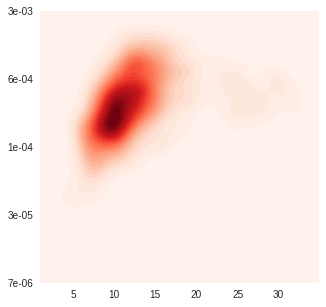

In [14]:
uni_kde(dnpt.nplanets,dnpt.logeff)

{'bandwidth': 1.1793103448275861}


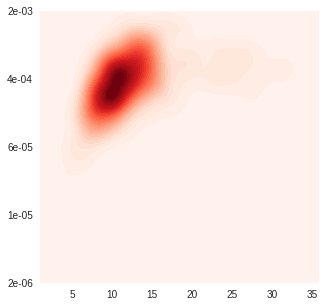

In [15]:
uni_kde(dlpt.nplanets,dlpt.logeff)

{'bandwidth': 2.0}


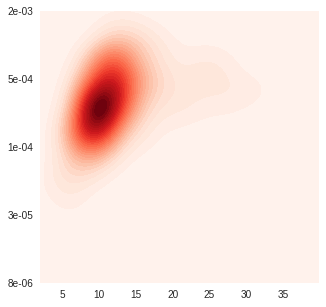

In [16]:
uni_kde(dhpt.nplanets,dhpt.logeff)

In [43]:
common=dnpt.ident[np.in1d(dnpt.ident,dnpg.ident)]

In [44]:
te=dnpt[np.in1d(dnpt.ident,common)]
gi=dnpg[np.in1d(dnpg.ident,common)]

In [45]:
tmb=[]
tnp=[]
for i,j,k,l in zip(gi.massbudget,te.massbudget,gi.nplanets,te.nplanets):
    tmb+=[i+j]
    tnp+=[k+l]
tmb=np.array(tmb)
tnp=np.array(tnp)

In [46]:
dfer=pd.DataFrame({'x' : tnp, 'y': np.log10(tmb)})

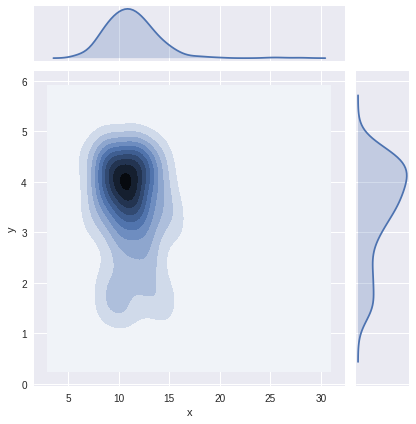

In [47]:
ax=sns.jointplot(x="x", y="y", data=dfer,kind="kde",stat_func=None)